In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

%matplotlib inline

final=pd.read_csv("SWAT.csv")

# **DBSCAN Part**

In [ ]:
final=final.drop(['Time','Anomalies'],axis=1)

In [ ]:
final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status_0,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status_1,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status_2,SWAT_SUTD:RSLinx Enterprise:P1.HMI_P101.Status_1,SWAT_SUTD:RSLinx Enterprise:P1.HMI_P101.Status_2,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status_0,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status_1,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status_2,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P201.Status_1,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P201.Status_2,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P203.Status_1,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P203.Status_2,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P205.Status_1,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P205.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status_0,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status_0,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status_0,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status_0,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_P301.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_P301.Status_2,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P401.Status_1,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P401.Status_2,SWAT_SUTD:RSLinx Enterprise:P5.HMI_P501.Status_1,SWAT_SUTD:RSLinx Enterprise:P5.HMI_P501.Status_2,SWAT_SUTD:RSLinx Enterprise:P6.HMI_P602.Status_1,SWAT_SUTD:RSLinx Enterprise:P6.HMI_P602.Status_2,SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status_1,SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status_2
0,9.386796,-1.033000,0.979879,-0.455748,0.965234,-1.039768,-0.891766,-1.032946,-1.363243,0.896180,1.884953,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0
1,9.420973,-1.042186,0.930978,-0.393594,1.027893,-1.025857,-0.933354,-1.084686,-1.350287,0.894811,1.874277,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0
2,8.979472,16.283727,9.997017,5.320341,-2.038042,51.136346,10.867623,3.310531,14.703730,10.837839,5.673529,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1
3,7.195370,7.579652,6.100799,2.021809,-1.577801,23.695636,5.434829,1.912542,6.854509,5.775119,3.859446,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1
4,5.375259,2.571830,3.453027,0.680791,-1.109805,6.082446,1.757742,0.771272,2.582760,1.389896,2.914838,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1


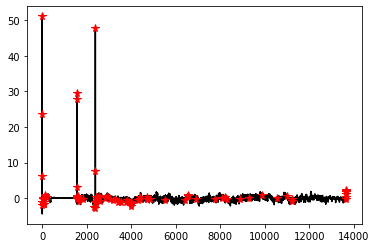

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbb=DBSCAN(eps=2.5,min_samples=5)
dbb.fit(final)

outlier_pos = np.where(dbb.labels_ == -1)[0]

x = []; y = [];
for pos in outlier_pos:
    x.append(np.array(final['PC6'])[pos])
    y.append(final['PC6'].index[pos])

plt.plot(final['PC6'].loc[final['PC6'].index], 'k-')
plt.plot(y,x,'r*', markersize=8) 

In [ ]:
labels = dbb.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbb.core_sample_indices_] = True

In [ ]:
#converting the array into dataframe to group by labels and check the counts
labels_df =  pd.DataFrame(labels, columns=['cluster'])
labels_df['cluster'].value_counts()

 1    12239
 3     1194
-1       82
 4       57
 5       53
 2       14
 0       10
 7        6
 6        6
Name: cluster, dtype: int64

In [ ]:
labels_df.head()

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1


In [ ]:
result = pd.concat([final, labels_df], axis=1)

In [ ]:
result.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status_0,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status_1,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status_2,SWAT_SUTD:RSLinx Enterprise:P1.HMI_P101.Status_1,SWAT_SUTD:RSLinx Enterprise:P1.HMI_P101.Status_2,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status_0,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status_1,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status_2,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P201.Status_1,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P201.Status_2,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P203.Status_1,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P203.Status_2,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P205.Status_1,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P205.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status_0,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status_0,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status_0,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status_0,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_P301.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_P301.Status_2,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P401.Status_1,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P401.Status_2,SWAT_SUTD:RSLinx Enterprise:P5.HMI_P501.Status_1,SWAT_SUTD:RSLinx Enterprise:P5.HMI_P501.Status_2,SWAT_SUTD:RSLinx Enterprise:P6.HMI_P602.Status_1,SWAT_SUTD:RSLinx Enterprise:P6.HMI_P602.Status_2,SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status_1,SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status_2,cluster
0,9.386796,-1.033000,0.979879,-0.455748,0.965234,-1.039768,-0.891766,-1.032946,-1.363243,0.896180,1.884953,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,-1
1,9.420973,-1.042186,0.930978,-0.393594,1.027893,-1.025857,-0.933354,-1.084686,-1.350287,0.894811,1.874277,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,-1
2,8.979472,16.283727,9.997017,5.320341,-2.038042,51.136346,10.867623,3.310531,14.703730,10.837839,5.673529,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,-1
3,7.195370,7.579652,6.100799,2.021809,-1.577801,23.695636,5.434829,1.912542,6.854509,5.775119,3.859446,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,-1
4,5.375259,2.571830,3.453027,0.680791,-1.109805,6.082446,1.757742,0.771272,2.582760,1.389896,2.914838,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,-1


In [ ]:
result["cluster"].replace({-1: 1, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0,7: 0}, inplace=True)

In [ ]:
result.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status_0,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status_1,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status_2,SWAT_SUTD:RSLinx Enterprise:P1.HMI_P101.Status_1,SWAT_SUTD:RSLinx Enterprise:P1.HMI_P101.Status_2,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status_0,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status_1,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status_2,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P201.Status_1,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P201.Status_2,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P203.Status_1,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P203.Status_2,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P205.Status_1,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P205.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status_0,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status_0,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status_0,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status_0,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status_2,SWAT_SUTD:RSLinx Enterprise:P3.HMI_P301.Status_1,SWAT_SUTD:RSLinx Enterprise:P3.HMI_P301.Status_2,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P401.Status_1,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P401.Status_2,SWAT_SUTD:RSLinx Enterprise:P5.HMI_P501.Status_1,SWAT_SUTD:RSLinx Enterprise:P5.HMI_P501.Status_2,SWAT_SUTD:RSLinx Enterprise:P6.HMI_P602.Status_1,SWAT_SUTD:RSLinx Enterprise:P6.HMI_P602.Status_2,SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status_1,SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status_2,cluster
0,9.386796,-1.033000,0.979879,-0.455748,0.965234,-1.039768,-0.891766,-1.032946,-1.363243,0.896180,1.884953,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
1,9.420973,-1.042186,0.930978,-0.393594,1.027893,-1.025857,-0.933354,-1.084686,-1.350287,0.894811,1.874277,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2,8.979472,16.283727,9.997017,5.320341,-2.038042,51.136346,10.867623,3.310531,14.703730,10.837839,5.673529,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,1
3,7.195370,7.579652,6.100799,2.021809,-1.577801,23.695636,5.434829,1.912542,6.854509,5.775119,3.859446,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1
4,5.375259,2.571830,3.453027,0.680791,-1.109805,6.082446,1.757742,0.771272,2.582760,1.389896,2.914838,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1


In [ ]:
result['cluster'].value_counts()

0    13579
1       82
Name: cluster, dtype: int64

In [ ]:
len(result.columns)

48

# **Decision Tree part**

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
X = result.iloc[:,  0:47]
y = result.cluster

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9965845328128812


In [ ]:
with open('./models/pipeline3.pickle', 'wb') as f:
    pickle.dump(model3, f)